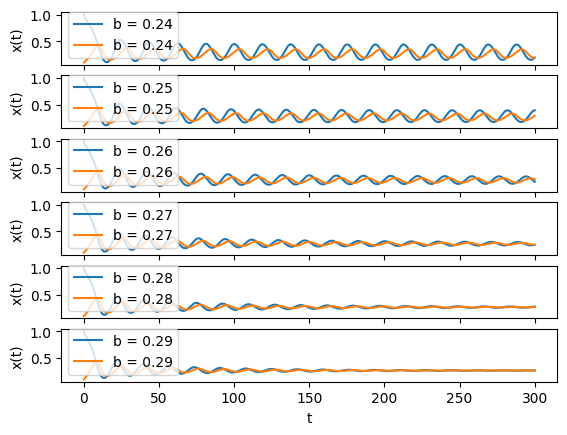

In [50]:
# shooting

from solve_to import *
from solvers import *
import matplotlib.pyplot as plt


a = 1
d = 0.1
b = 0.2

def ode(Y, t, args = (a, b, d)):
    x, y = Y
    return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])

b_vals = np.linspace(0.24, 0.29, 6)
fig, ax = plt.subplots(len(b_vals), 1)

for i, b in enumerate(b_vals):
    Y, t = solve_to(ode, [1, 0.1], 0, 300, 0.01, 'RK4')
    # For each plot, plot y1(t) and y2(t) on the same plot against t
    ax[i].plot(t, Y, label='b = %.2f' %(b))
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('x(t)')
    ax[i].legend(loc='best')

plt.show()

Initial guess:  0.01 dy/dx at t = 100 (arbitrary):  0.021424263420644008
New guess:  0.00978575736579356 dy/dx at t = 100 (arbitrary):  0.021689600081761892
New guess:  0.00956886136497594 dy/dx at t = 100 (arbitrary):  0.021947717647590622
New guess:  0.009349384188500034 dy/dx at t = 100 (arbitrary):  0.022197934358406734
New guess:  0.009127404844915966 dy/dx at t = 100 (arbitrary):  0.02243954941817308
New guess:  0.008903009350734235 dy/dx at t = 100 (arbitrary):  0.022671844345664546
New guess:  0.00867629090727759 dy/dx at t = 100 (arbitrary):  0.0228940845535723
New guess:  0.008447350061741866 dy/dx at t = 100 (arbitrary):  0.02310552116716219
New guess:  0.008216294850070244 dy/dx at t = 100 (arbitrary):  0.023305393092403322
New guess:  0.007983240919146211 dy/dx at t = 100 (arbitrary):  0.02349292934145472
New guess:  0.007748311625731664 dy/dx at t = 100 (arbitrary):  0.023667351620765248
New guess:  0.0075116381095240116 dy/dx at t = 100 (arbitrary):  0.023827877183845363

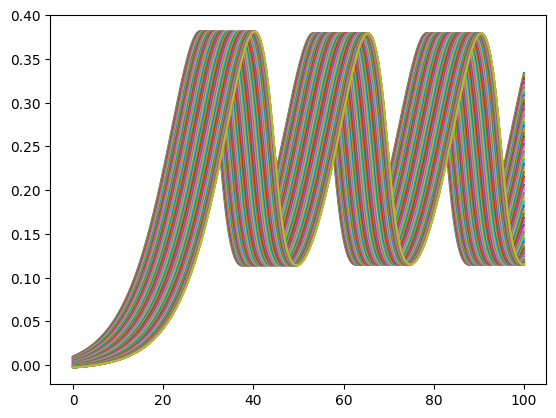

In [65]:
### isolate the limit cycle
# for a value of b = 0.24, isolate the periodic orbit of the solution

b = 0.15
guess = 0.01
step = 0.01
Y, t = solve_to(ode, [1, guess], 0, 100, 0.01, 'RK4')
Y = np.array(Y)
def dy_dt(x, y, b):
    return b*y*(1- (y/x))
    

# find the bit of the solution that is periodic
x , y = Y[:,0], Y[:,1]
dy = dy_dt(x,y,b)

print('Initial guess: ', guess, 'dy/dx at t = 100 (arbitrary): ', dy[-1])
plt.plot(t, y, label='guess = %.2f' %(guess))

# the goal is to make the gradient dy/dx = 0 at t = 100
# we can do this by shooting the solution until the gradient is zero

while np.round(dy[-1],3) != 0:
    guess += step * (0 - dy[-1]) # change the guess by the gradient
    Y, t = solve_to(ode, [1, guess], 0, 100, 0.01, 'RK4')
    Y = np.array(Y)
    x , y = Y[:,0], Y[:,1]
    dy = dy_dt(x,y,b)
    print('New guess: ', guess, 'dy/dx at t = 100 (arbitrary): ', dy[-1])
    plt.plot(t, y, label='guess = %.2f' %(guess))






This script aims to find the starting condition that finds a dy/dt gradient = 0 at t = 100 using the shooting method. By starting with an initial guess and then using the error to scale the guess to approach the solution to a certain tolerance.